# Covid-19 Cases Statewise

## Task: To study state-wise covid-19 cases

## Description: In march 2020 covid-19 cases started to spread in India. There was a fear and panic situation among the people. There was no exact details of total covid-19 cases. Every source showed different numbers. Hence there was a need to develop a platform to show the exact number of covid-19 cases. Also to study its spread in different states, statewise numbers of covid-19 cases was required.                                                                                           Hence to provide a solution to this problem we developed a platform to study covid-19 cases statewise

### Step 1: Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Loading the dataset

In [2]:
date_wise = pd.read_csv("covid_19_india.csv",parse_dates=["Date"])

### Step 3: Overview of the dataset

In [3]:
date_wise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15806 entries, 0 to 15805
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Sno                       15806 non-null  int64         
 1   Date                      15806 non-null  datetime64[ns]
 2   Time                      15806 non-null  object        
 3   State/UnionTerritory      15806 non-null  object        
 4   ConfirmedIndianNational   15806 non-null  object        
 5   ConfirmedForeignNational  15806 non-null  object        
 6   Cured                     15806 non-null  int64         
 7   Deaths                    15806 non-null  int64         
 8   Confirmed                 15806 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 1.1+ MB


### Step 4: Checking for null values

In [4]:
date_wise.isna().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

### Step 5: Top 5 and Bottom 5 values of dataset

In [5]:
date_wise.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [6]:
date_wise.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
15801,15802,2021-06-08,8:00 AM,Telangana,-,-,564303,3394,593103
15802,15803,2021-06-08,8:00 AM,Tripura,-,-,49579,572,56169
15803,15804,2021-06-08,8:00 AM,Uttarakhand,-,-,313566,6731,334419
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,-,-,1662069,21333,1699083
15805,15806,2021-06-08,8:00 AM,West Bengal,-,-,1388771,16362,1432019


### Step 6: Dropping the unwanted columns

In [7]:
date_wise.drop(['Sno','Time'],axis='columns')

,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,1,0,0,0,1
1,2020-01-31,Kerala,1,0,0,0,1
2,2020-02-01,Kerala,2,0,0,0,2
3,2020-02-02,Kerala,3,0,0,0,3
4,2020-02-03,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...
15801,2021-06-08,Telangana,-,-,564303,3394,593103
15802,2021-06-08,Tripura,-,-,49579,572,56169
15803,2021-06-08,Uttarakhand,-,-,313566,6731,334419
15804,2021-06-08,Uttar Pradesh,-,-,1662069,21333,1699083


In [8]:
date_wise.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis='columns')

,Sno,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,0,0,3
...,...,...,...,...,...,...,...
15801,15802,2021-06-08,8:00 AM,Telangana,564303,3394,593103
15802,15803,2021-06-08,8:00 AM,Tripura,49579,572,56169
15803,15804,2021-06-08,8:00 AM,Uttarakhand,313566,6731,334419
15804,15805,2021-06-08,8:00 AM,Uttar Pradesh,1662069,21333,1699083


### Step 7: Showing all the state names

In [9]:
date_wise["State/UnionTerritory"].unique()

array(['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh',
       'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra',
       'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand',
       'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh',
       'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh',
       'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands',
       'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh',
       'Tripura', 'Nagaland', 'Meghalaya',
       'Dadra and Nagar Haveli and Daman and Diu',
       'Cases being reassigned to states', 'Sikkim', 'Daman & Diu',
       'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli'], dtype=object)

### Step 8: Visualizing Cases for a particular state

In [10]:
MH_cases = date_wise[date_wise['State/UnionTerritory']=='Maharashtra']

In [11]:
MH_cases

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
76,77,2020-03-09,6:00 PM,Maharashtra,2,0,0,0,2
91,92,2020-03-10,6:00 PM,Maharashtra,5,0,0,0,5
97,98,2020-03-11,6:00 PM,Maharashtra,2,0,0,0,2
120,121,2020-03-12,6:00 PM,Maharashtra,11,0,0,0,11
133,134,2020-03-13,6:00 PM,Maharashtra,14,0,0,0,14
...,...,...,...,...,...,...,...,...,...
15646,15647,2021-06-04,8:00 AM,Maharashtra,-,-,5486206,97394,5791413
15682,15683,2021-06-05,8:00 AM,Maharashtra,-,-,5507058,98771,5805565
15718,15719,2021-06-06,8:00 AM,Maharashtra,-,-,5528834,99512,5819224
15754,15755,2021-06-07,8:00 AM,Maharashtra,-,-,5543267,100130,5831781


In [12]:
MH_cases = date_wise[date_wise['State/UnionTerritory']=='Maharashtra'][['Date','Confirmed']]

In [13]:
MH_cases

,Date,Confirmed
76,2020-03-09,2
91,2020-03-10,5
97,2020-03-11,2
120,2020-03-12,11
133,2020-03-13,14
...,...,...
15646,2021-06-04,5791413
15682,2021-06-05,5805565
15718,2021-06-06,5819224
15754,2021-06-07,5831781


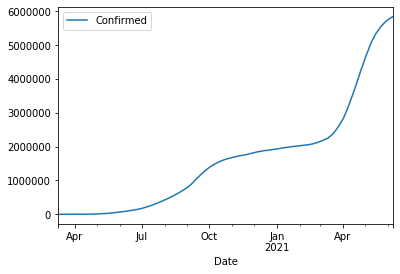

In [14]:
MH_cases.plot(x='Date',y='Confirmed')

In [15]:
MH_cases = date_wise[date_wise['State/UnionTerritory']=='Maharashtra'][['Date','Cured']]

In [16]:
MH_cases

,Date,Cured
76,2020-03-09,0
91,2020-03-10,0
97,2020-03-11,0
120,2020-03-12,0
133,2020-03-13,0
...,...,...
15646,2021-06-04,5486206
15682,2021-06-05,5507058
15718,2021-06-06,5528834
15754,2021-06-07,5543267


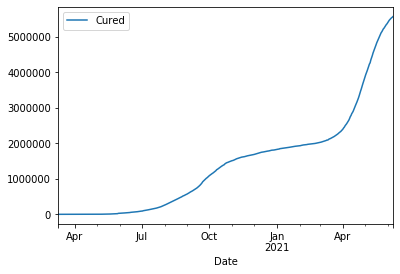

In [17]:
MH_cases.plot(x='Date',y='Cured')

In [18]:
MH_cases = date_wise[date_wise['State/UnionTerritory']=='Maharashtra'][['Date','Deaths']]

In [19]:
MH_cases

,Date,Deaths
76,2020-03-09,0
91,2020-03-10,0
97,2020-03-11,0
120,2020-03-12,0
133,2020-03-13,0
...,...,...
15646,2021-06-04,97394
15682,2021-06-05,98771
15718,2021-06-06,99512
15754,2021-06-07,100130


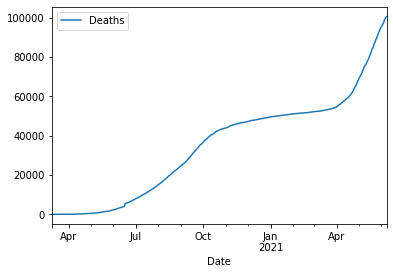

In [20]:
MH_cases.plot(x='Date',y='Deaths')

### Step 9: Visualizing the Confirmed cases for all states

C:\Users\soham\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1095: UserWarning: Attempting to set identical left == right == 18424.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


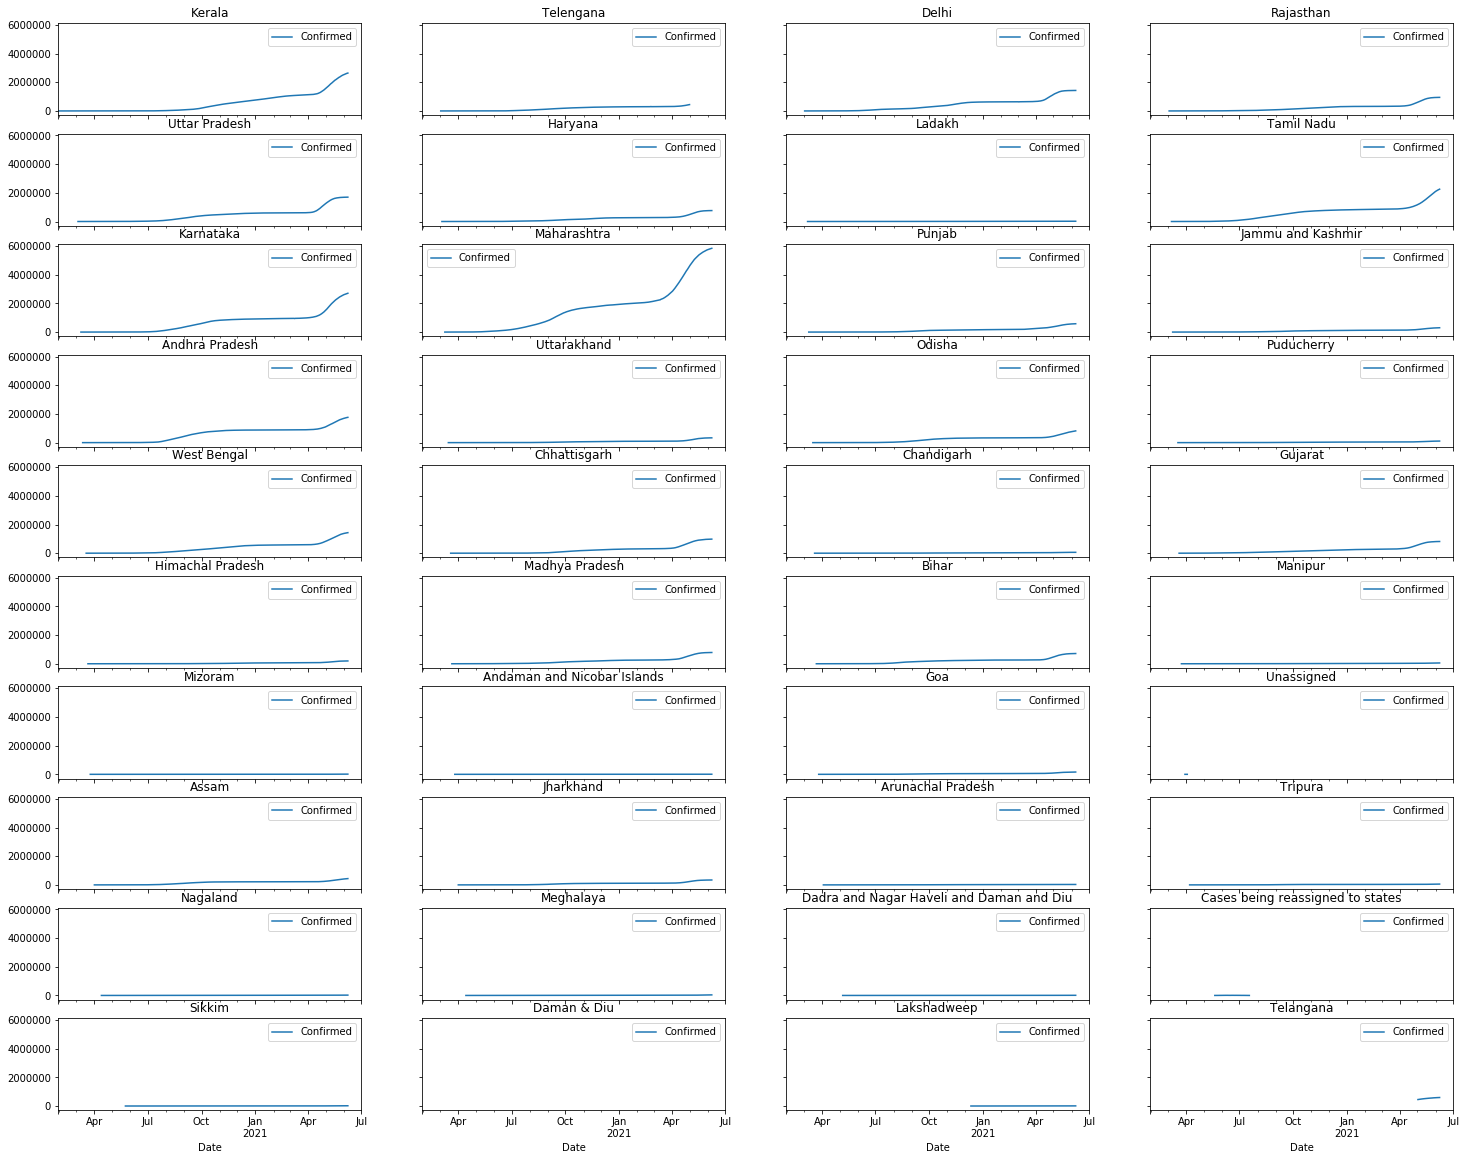

In [21]:
fig, ax = plt.subplots(nrows = 10, ncols = 4, figsize=(25,20), sharex = True, sharey = True)
i = 0
j = 0

for k in date_wise["State/UnionTerritory"].unique():
    temp = date_wise[date_wise["State/UnionTerritory"]==k][['Date','Confirmed']]
    temp.plot(x='Date',y='Confirmed', ax=ax[i,j], title=k, xlim=(pd.Timestamp('2020-01-30'), pd.Timestamp('2021-07-01')))
    
    j = j+1
    if(j==4):
        i = i+1
        j = 0
    else:
        pass
    if(i==10):
        break

### Step 10: Visualizing the Cured cases for all states

C:\Users\soham\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1095: UserWarning: Attempting to set identical left == right == 18424.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


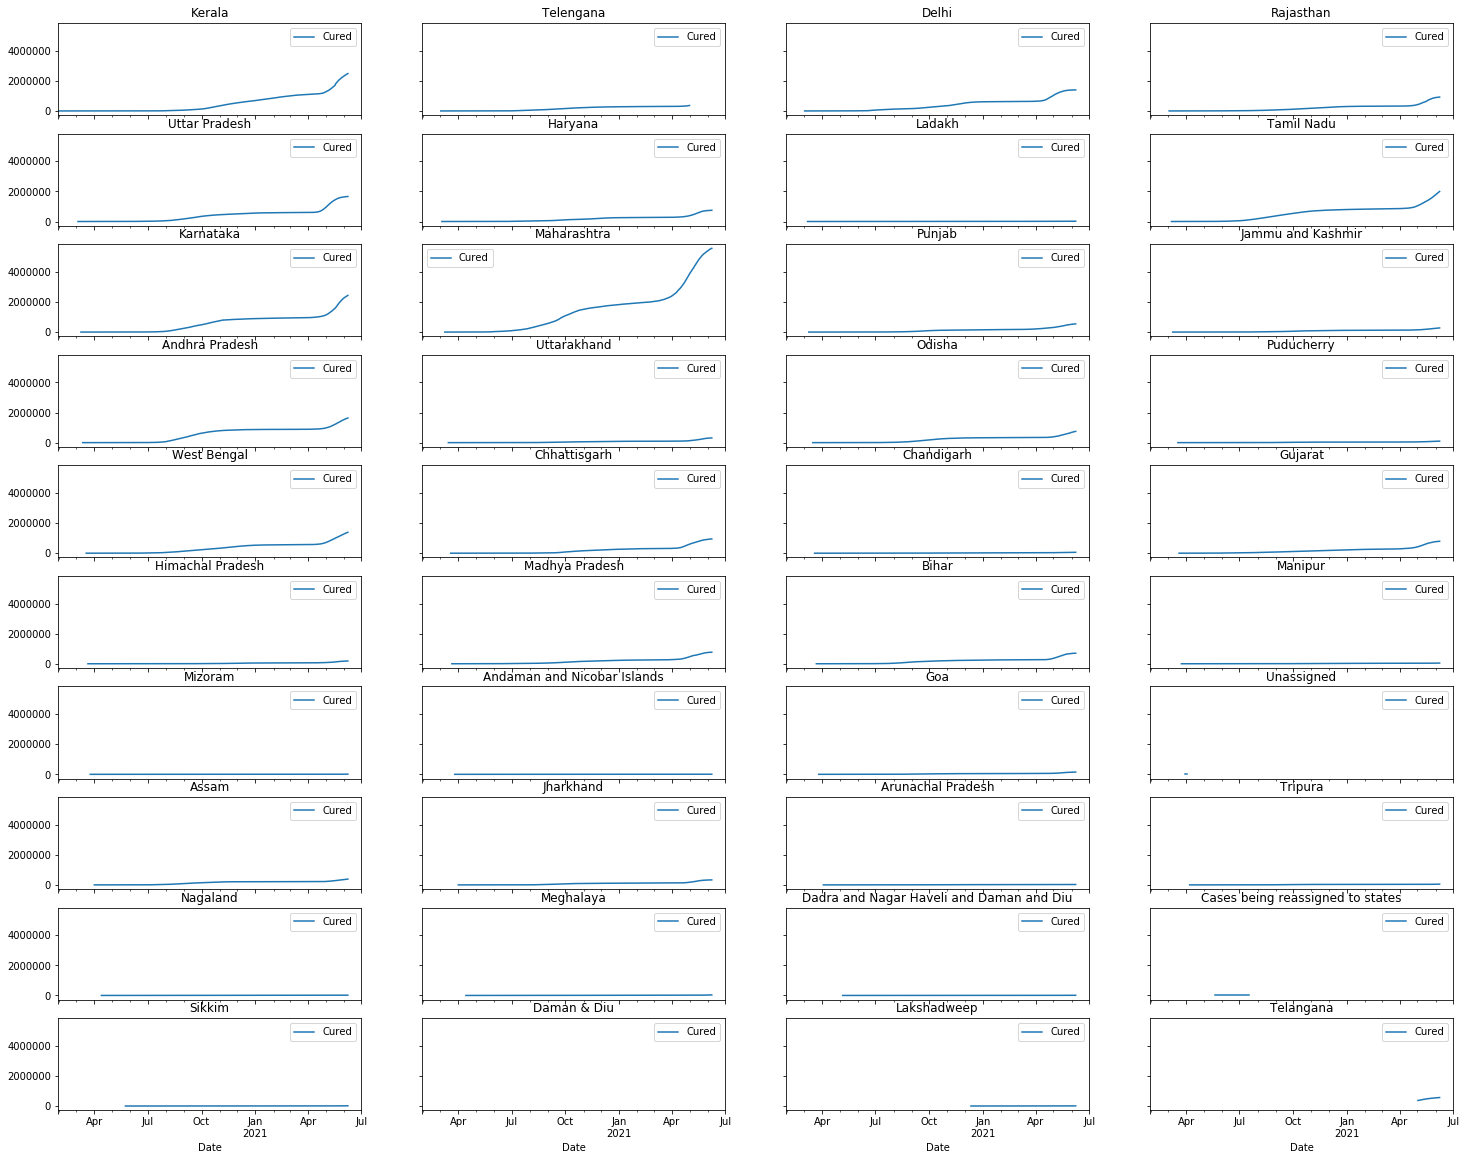

In [22]:
fig, ax = plt.subplots(nrows = 10, ncols = 4, figsize=(25,20), sharex = True, sharey = True)
i = 0
j = 0

for k in date_wise["State/UnionTerritory"].unique():
    temp = date_wise[date_wise["State/UnionTerritory"]==k][['Date','Cured']]
    temp.plot(x='Date',y='Cured', ax=ax[i,j], title=k, xlim=(pd.Timestamp('2020-01-30'), pd.Timestamp('2021-07-01')))
    
    j = j+1
    if(j==4):
        i = i+1
        j = 0
    else:
        pass
    if(i==10):
        break

### Step 11: Visualizing the Deaths for all states

C:\Users\soham\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:1095: UserWarning: Attempting to set identical left == right == 18424.0 results in singular transformations; automatically expanding.
  ax.set_xlim(left, right)


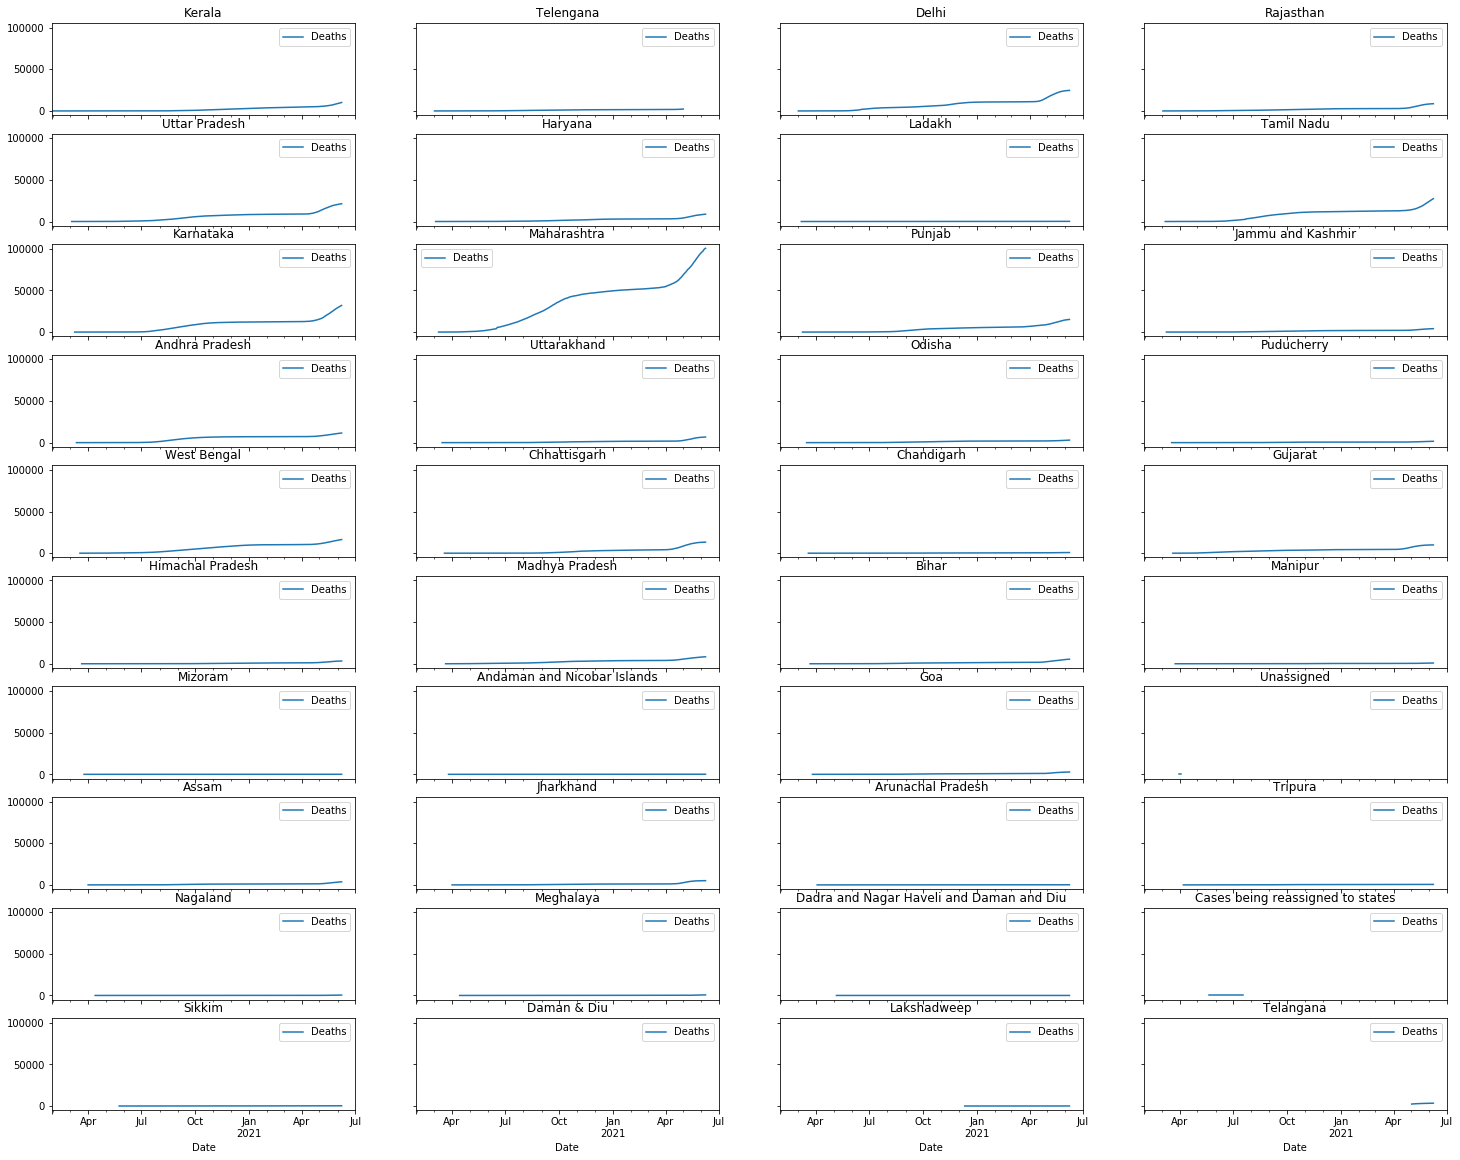

In [23]:
fig, ax = plt.subplots(nrows = 10, ncols = 4, figsize=(25,20), sharex = True, sharey = True)
i = 0
j = 0

for k in date_wise["State/UnionTerritory"].unique():
    temp = date_wise[date_wise["State/UnionTerritory"]==k][['Date','Deaths']]
    temp.plot(x='Date',y='Deaths', ax=ax[i,j], title=k, xlim=(pd.Timestamp('2020-01-30'), pd.Timestamp('2021-07-01')))
    
    j = j+1
    if(j==4):
        i = i+1
        j = 0
    else:
        pass
    if(i==10):
        break

### Step 12: Visualizing the 'Confirmed vs Cured' & 'Confirmed vs Deaths' & 'Cured vs Deaths' for a particular state

In [24]:
MH_cases = date_wise[date_wise['State/UnionTerritory']=='Maharashtra'][['Date','Confirmed','Cured','Deaths']]

In [25]:
MH_cases

,Date,Confirmed,Cured,Deaths
76,2020-03-09,2,0,0
91,2020-03-10,5,0,0
97,2020-03-11,2,0,0
120,2020-03-12,11,0,0
133,2020-03-13,14,0,0
...,...,...,...,...
15646,2021-06-04,5791413,5486206,97394
15682,2021-06-05,5805565,5507058,98771
15718,2021-06-06,5819224,5528834,99512
15754,2021-06-07,5831781,5543267,100130


In [26]:
a = date_wise[date_wise['State/UnionTerritory']=='Maharashtra'][['Date','Confirmed']]
b = date_wise[date_wise['State/UnionTerritory']=='Maharashtra'][['Date','Cured']]
c = date_wise[date_wise['State/UnionTerritory']=='Maharashtra'][['Date','Deaths']]

In [27]:
x_a = a['Date']
y_a = a['Confirmed']

x_b = b['Date']
y_b = b['Cured']

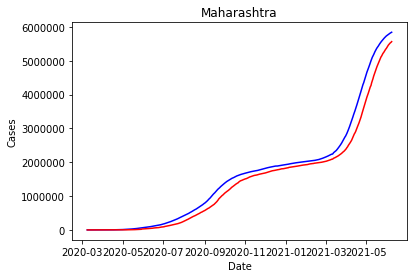

In [28]:
plt.plot(x_a, y_a, color='blue',label='Confirmed')
plt.plot(x_b, y_b, color='red',label='Cured')

plt.title('Maharashtra')
plt.xlabel('Date')
plt.ylabel('Cases')

plt.show()

In [29]:
x_a = a['Date']
y_a = a['Confirmed']

x_c = c['Date']
y_c = c['Deaths']

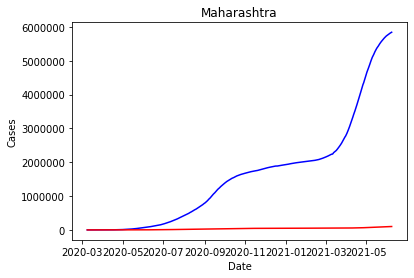

In [30]:
plt.plot(x_a, y_a, color='blue',label='Confirmed')
plt.plot(x_c, y_c, color='red',label='Deaths')

plt.title('Maharashtra')
plt.xlabel('Date')
plt.ylabel('Cases')

plt.show()

In [31]:
x_b = b['Date']
y_b = b['Cured']

x_c = c['Date']
y_c = c['Deaths']

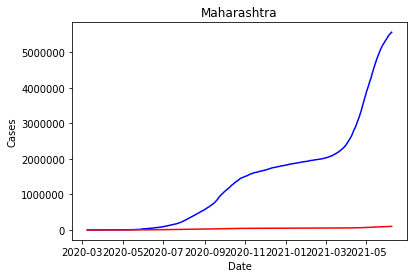

In [32]:
plt.plot(x_b, y_b, color='blue',label='Confirmed')
plt.plot(x_c, y_c, color='red',label='Deaths')

plt.title('Maharashtra')
plt.xlabel('Date')
plt.ylabel('Cases')

plt.show()

### Step 13: Taking input and Visualizing the 'Confirmed vs Cured' & 'Confirmed vs Deaths' & 'Cured vs Deaths' for a input state (Normal Graph)

In [33]:
s = input("Enter a State/Union Territory: ")
s

Enter a State/Union Territory: Goa


'Goa'

In [34]:
ip = date_wise[date_wise['State/UnionTerritory']==s]
ip

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
371,372,2020-03-26,6:00 PM,Goa,3,0,0,0,3
398,399,2020-03-27,10:00 AM,Goa,3,0,0,0,3
425,426,2020-03-28,6:00 PM,Goa,3,0,0,0,3
452,453,2020-03-29,7:30 PM,Goa,-,-,0,0,5
479,480,2020-03-30,9:30 PM,Goa,-,-,0,0,5
...,...,...,...,...,...,...,...,...,...
15635,15636,2021-06-04,8:00 AM,Goa,-,-,145437,2710,157847
15671,15672,2021-06-05,8:00 AM,Goa,-,-,146597,2727,158423
15707,15708,2021-06-06,8:00 AM,Goa,-,-,148030,2744,158990
15743,15744,2021-06-07,8:00 AM,Goa,-,-,149479,2760,159393


In [35]:
m_x = ip['Date']
m_y = ip['Cured']

n_x = ip['Date']
n_y = ip['Confirmed']

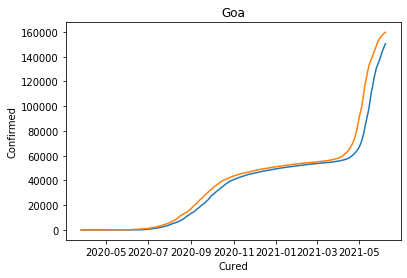

In [36]:
plt.plot(m_x, m_y)
plt.plot(n_x, n_y)

plt.title(s)
plt.xlabel('Cured')
plt.ylabel('Confirmed')

plt.show()

In [37]:
m_x = ip['Date']
m_y = ip['Confirmed']

n_x = ip['Date']
n_y = ip['Deaths']

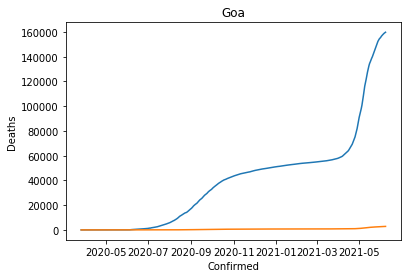

In [38]:
plt.plot(m_x, m_y)
plt.plot(n_x, n_y)

plt.title(s)
plt.xlabel('Confirmed')
plt.ylabel('Deaths')

plt.show()

In [39]:
m_x = ip['Date']
m_y = ip['Cured']

n_x = ip['Date']
n_y = ip['Deaths']

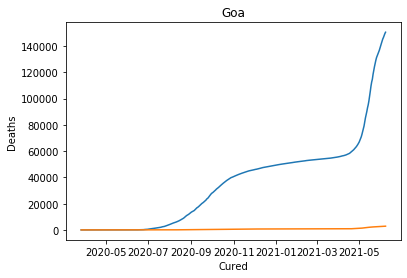

In [40]:
plt.plot(m_x, m_y)
plt.plot(n_x, n_y)

plt.title(s)
plt.xlabel('Cured')
plt.ylabel('Deaths')

plt.show()

### Step 14: Taking input and Visualizing the Confirmed, Cured & Deaths for input state (Normal Graph)

Select a option
1. Confirmed
2. Cured
3. Deaths
2
Enter a state: Maharashtra
            Date    Cured
76    2020-03-09        0
91    2020-03-10        0
97    2020-03-11        0
120   2020-03-12        0
133   2020-03-13        0
...          ...      ...
15646 2021-06-04  5486206
15682 2021-06-05  5507058
15718 2021-06-06  5528834
15754 2021-06-07  5543267
15790 2021-06-08  5564348

[457 rows x 2 columns]


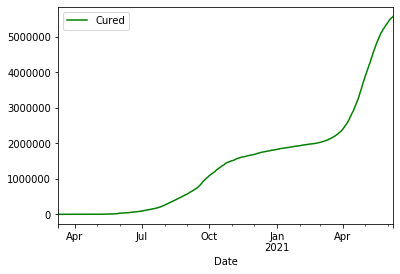

In [41]:
option = print("Select a option")
options1 = print("1. Confirmed")
options2 = print("2. Cured")
options3 = print("3. Deaths")
q = int(input())
entry = input("Enter a state: ")

if(q==1):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed']]
    print(ip)
    ip.plot(x='Date',y='Confirmed',color='Blue')
    #a_x = ip['Date']
    #a_y = ip['Confirmed']
    #plt.plot(a_x,a_y)
    #plt.title(entry)
    #plt.show()
    
elif(q==2):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured']]
    print(ip)
    ip.plot(x='Date',y='Cured',color='Green')
    #b_x = ip['Date']
    #b_y = ip['Cured']
    #plt.plot(b_x,b_y)
    #plt.title(entry)
    #plt.show()
    
elif(q==3):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Deaths']]
    print(ip)
    ip.plot(x='Date',y='Deaths',color='Red')
    #c_x = ip['Date']
    #c_y = ip['Deaths']
    #plt.plot(c_x,c_y)
    #plt.title(entry)
    #plt.show()

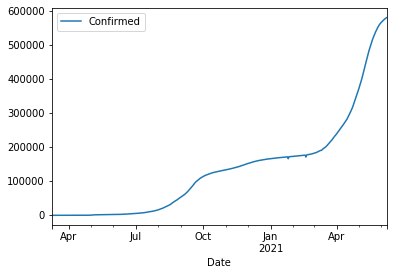

In [42]:
ips = date_wise[date_wise['State/UnionTerritory']=='Punjab'][['Date','Confirmed']]

ips.plot(x='Date',y='Confirmed')

### Step 15: Taking input and Visualizing the Confirmed, Cured, Deaths, 'Confirmed vs Cured', 'Confirmed vs Deaths', 'Cured vs Deaths' for input state (Normal Graph)

Select a option
1. Confirmed
2. Cured
3. Deaths
4. Confirmed vs Cured
5. Confirmed vs Deaths
6. Cured vs Deaths
4
Enter a state: Goa


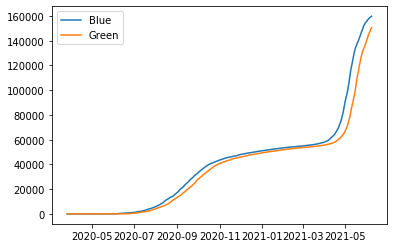

In [43]:
option = print("Select a option")
options1 = print("1. Confirmed")
options2 = print("2. Cured")
options3 = print("3. Deaths")
options4 = print("4. Confirmed vs Cured")
options5 = print("5. Confirmed vs Deaths")
options6 = print("6. Cured vs Deaths")
q = int(input())
entry = input("Enter a state: ")

if(q==1):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed']]
    print(ip)
    ip.plot(x='Date',y='Confirmed',color='Blue')
    #a_x = ip['Date']
    #a_y = ip['Confirmed']
    #plt.plot(a_x,a_y)
    #plt.title(entry)
    #plt.show()
    
elif(q==2):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured']]
    print(ip)
    ip.plot(x='Date',y='Cured',color='Green')
    #b_x = ip['Date']
    #b_y = ip['Cured']
    #plt.plot(b_x,b_y)
    #plt.title(entry)
    #plt.show()
    
elif(q==3):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Deaths']]
    print(ip)
    ip.plot(x='Date',y='Deaths',color='Red')
    #c_x = ip['Date']
    #c_y = ip['Deaths']
    #plt.plot(c_x,c_y)
    #plt.title(entry)
    #plt.show()
    
elif(q==4):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed']]
    ip2 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured']]
    x = ip1['Date']
    y = ip1['Confirmed']
    t = ip2['Date']
    z = ip2['Cured']
    plt.plot(x,y,label=y)
    plt.plot(t,z,label=z)
    plt.legend(["Blue","Green"])
    plt.show()
    
elif(q==5):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed']]
    ip2 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Deaths']]
    x = ip1['Date']
    y = ip1['Confirmed']
    t = ip2['Date']
    z = ip2['Deaths']
    plt.plot(x,y,label=y)
    plt.plot(t,z,label=z)
    plt.legend(["Blue","Red"])
    plt.show()
    
elif(q==6):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured']]
    ip2 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Deaths']]
    x = ip1['Date']
    y = ip1['Cured']
    t = ip2['Date']
    z = ip2['Deaths']
    plt.plot(x,y,label=y)
    plt.plot(t,z,label=z)
    plt.legend(["Green","Red"])
    plt.show()

In [44]:
import datetime
ip =  date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed','Cured']]
ip['month'] = pd.DatetimeIndex(ip['Date']).month
ip

,Date,Confirmed,Cured,month
371,2020-03-26,3,0,3
398,2020-03-27,3,0,3
425,2020-03-28,3,0,3
452,2020-03-29,5,0,3
479,2020-03-30,5,0,3
...,...,...,...,...
15635,2021-06-04,157847,145437,6
15671,2021-06-05,158423,146597,6
15707,2021-06-06,158990,148030,6
15743,2021-06-07,159393,149479,6


In [45]:
ip

,Date,Confirmed,Cured,month
371,2020-03-26,3,0,3
398,2020-03-27,3,0,3
425,2020-03-28,3,0,3
452,2020-03-29,5,0,3
479,2020-03-30,5,0,3
...,...,...,...,...
15635,2021-06-04,157847,145437,6
15671,2021-06-05,158423,146597,6
15707,2021-06-06,158990,148030,6
15743,2021-06-07,159393,149479,6


2020-05-04
2020-07-08


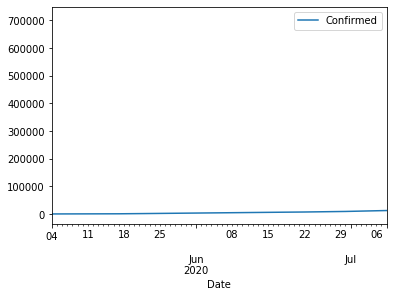

In [46]:
st_date = input()
end_date = input()
temp = date_wise[date_wise["State/UnionTerritory"]=='Bihar'][['Date','Confirmed']]
temp.plot(x='Date',y='Confirmed', xlim=(pd.Timestamp(st_date), pd.Timestamp(end_date)))

### Step 16: Taking input and Visualizing the Confirmed, Cured, Deaths, 'Confirmed vs Cured', 'Confirmed vs Deaths', 'Cured vs Deaths' for input state within a particular time period (Normal Graph)

Select a option
1. Confirmed
2. Cured
3. Deaths
4. Confirmed vs Cured
5. Confirmed vs Deaths
6. Cured vs Deaths
5
Enter a state: Maharashtra
Enter starting date: 2020-04-01
Enter the ending date: 2020-05-30


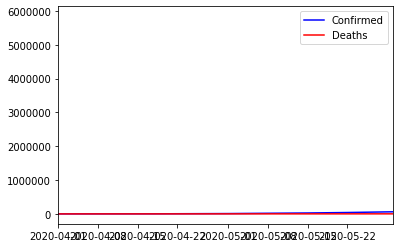

In [47]:
option = print("Select a option")
options1 = print("1. Confirmed")
options2 = print("2. Cured")
options3 = print("3. Deaths")
options4 = print("4. Confirmed vs Cured")
options5 = print("5. Confirmed vs Deaths")
options6 = print("6. Cured vs Deaths")
q = int(input())
entry = input("Enter a state: ")
st_date = input("Enter starting date: ")
end_date = input("Enter the ending date: ")

if(q==1):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed']]
    print(ip)
    ip.plot(x='Date',y='Confirmed',color='Blue',xlim=(pd.Timestamp(st_date), pd.Timestamp(end_date)))
    #a_x = ip['Date']
    #a_y = ip['Confirmed']
    #plt.plot(a_x,a_y)
    #plt.title(entry)
    #plt.show()
    
elif(q==2):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured']]
    print(ip)
    ip.plot(x='Date',y='Cured',color='Green',xlim=(pd.Timestamp(st_date), pd.Timestamp(end_date)))
    #b_x = ip['Date']
    #b_y = ip['Cured']
    #plt.plot(b_x,b_y)
    #plt.title(entry)
    #plt.show()
    
elif(q==3):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Deaths']]
    print(ip)
    ip.plot(x='Date',y='Deaths',color='Red',xlim=(pd.Timestamp(st_date), pd.Timestamp(end_date)))
    #c_x = ip['Date']
    #c_y = ip['Deaths']
    #plt.plot(c_x,c_y)
    #plt.title(entry)
    #plt.show()
    
elif(q==4):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed']]
    ip2 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured']]
    x = ip1['Date']
    y = ip1['Confirmed']
    t = ip2['Date']
    z = ip2['Cured']
    plt.plot(x,y,label=y,color='Blue')
    plt.plot(t,z,label=z,color='Green')
    plt.xlim((pd.Timestamp(st_date), pd.Timestamp(end_date)))
    plt.legend(["Confirmed","Cured"])
    plt.show()
    
elif(q==5):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed']]
    ip2 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Deaths']]
    x = ip1['Date']
    y = ip1['Confirmed']
    t = ip2['Date']
    z = ip2['Deaths']
    plt.plot(x,y,label=y,color='Blue')
    plt.plot(t,z,label=z,color='Red')
    plt.xlim((pd.Timestamp(st_date), pd.Timestamp(end_date)))
    plt.legend(["Confirmed","Deaths"])
    plt.show()
    
elif(q==6):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured']]
    ip2 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Deaths']]
    x = ip1['Date']
    y = ip1['Cured']
    t = ip2['Date']
    z = ip2['Deaths']
    plt.plot(x,y,label=y,color='Green')
    plt.plot(t,z,label=z,color='Red')
    plt.xlim((pd.Timestamp(st_date), pd.Timestamp(end_date)))
    
    plt.legend(["Cured","Death"])
    plt.show()

### Step 17: Taking input and Visualizing Confirmed, Cured & Deaths for two input states (Normal Graph)

Select a option
1. Confirmed
2. Cured
3. Deaths
1
Enter a state: Kerala
Enter a state: Goa


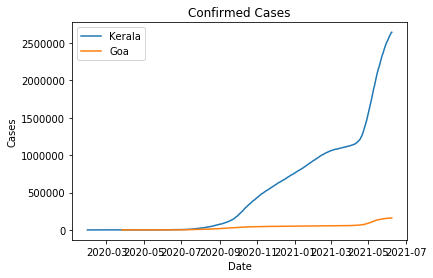

In [48]:
option = print("Select a option")
options1 = print("1. Confirmed")
options2 = print("2. Cured")
options3 = print("3. Deaths")
q = int(input())
entry1 = input("Enter a state: ")
entry2 = input("Enter a state: ")
#st_date = input("Enter starting date: ")
#end_date = input("Enter the ending date: ")

if(q==1):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry1][['Date','Confirmed']]
    ip2 = date_wise[date_wise['State/UnionTerritory']==entry2][['Date','Confirmed']]

    x1 = ip1['Date']
    y1 = ip1['Confirmed']
    
    x2 = ip2['Date']
    y2 = ip2['Confirmed']
    
    plt.title('Confirmed Cases')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    
    plt.plot(x1,y1)
    plt.plot(x2,y2)
    plt.legend([entry1,entry2])
    
    
elif(q==2):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry1][['Date','Cured']]
    ip2 = date_wise[date_wise['State/UnionTerritory']==entry2][['Date','Cured']]

    x1 = ip1['Date']
    y1 = ip1['Cured']
    
    x2 = ip2['Date']
    y2 = ip2['Cured']
    
    plt.title('Cured Cases')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    
    plt.plot(x1,y1)
    plt.plot(x2,y2)
    plt.legend([entry1,entry2])
    
    
elif(q==3):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry1][['Date','Deaths']]
    ip2 = date_wise[date_wise['State/UnionTerritory']==entry2][['Date','Deaths']]

    x1 = ip1['Date']
    y1 = ip1['Deaths']
    
    x2 = ip2['Date']
    y2 = ip2['Deaths']
    
    plt.title('Death Cases')
    plt.xlabel('Date')
    plt.ylabel('Cases')
    
    plt.plot(x1,y1)
    plt.plot(x2,y2)
    plt.legend([entry1,entry2])  

### Step 18: Taking input and Visualizing the Confirmed, Cured, Deaths, 'Confirmed vs Cured', 'Confirmed vs Deaths', 'Cured vs Deaths' for input state within a particular time period (Bar Graph)

In [49]:
option = print("Select a option")
options1 = print("1. Confirmed")
options2 = print("2. Cured")
options3 = print("3. Deaths")
options4 = print("4. Confirmed vs Cured")
options5 = print("5. Confirmed vs Deaths")
options6 = print("6. Cured vs Deaths")
options7 = print("7. Confirmed vs Cured vs Deaths")
q = int(input())
entry = input("Enter a state: ")
st_date = input("Enter starting date: ")
#end_date = input("Enter the ending date: ")

if(q==1):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed']]
    a = ip[ip['Date']==st_date]
    print(a)
    
elif(q==2):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured']]
    b = ip[ip['Date']==st_date]
    print(b)
    
elif(q==3):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Deaths']]
    a = ip[ip['Date']==st_date]
    print(a)
    
elif(q==4):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed','Cured']]
    #ip2 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured']]
    a = ip1[ip1['Date']==st_date]
    print(a)
    
elif(q==5):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed','Deaths']]
    a = ip1[ip1['Date']==st_date]
    print(a)
    
elif(q==6):
    ip1 = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Cured','Deaths']]
    a = ip1[ip1['Date']==st_date]
    print(a)
    
elif(q==7):
    ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed','Cured','Deaths']]
    a = ip[ip['Date']==st_date]

    x = ['Confirmed','Cured','Deaths']
    y = []
    y.append(a['Confirmed'].values[0])
    y.append(a['Cured'].values[0])
    y.append(a['Deaths'].values[0])

    print("The confirmed cases till %s are %d" %(date,y[0]))
    print("The recovered cases till %s are %d" %(date,y[1]))
    print("The deaths till %s are %d" %(date,y[2]))
    plt.bar(x,y)

Select a option
1. Confirmed
2. Cured
3. Deaths
4. Confirmed vs Cured
5. Confirmed vs Deaths
6. Cured vs Deaths
7. Confirmed vs Cured vs Deaths
4
Enter a state: Maharashtra
Enter starting date: 2020-07-08
           Date  Confirmed   Cured
3874 2020-07-08     217121  118558


### Step 19: Count of Confirmed, Cured, Deaths for a particular state on a particular date

In [50]:
ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed']]

In [51]:
ip = date_wise[date_wise['State/UnionTerritory']=='Goa'][['Date','Confirmed','Cured','Deaths']]
a = ip[ip['Date']=='2020-04-08']
x = ['Confirmed','Cured','Deaths']
y = []
#m = a['Confirmed'].tolist()
#n = a['Cured'].tolist()
#o = a['Deaths'].tolist()
#y.append(m)
#y.append(n)
#y.append(0)
#y
#y == sorted(y)
#t = [int("".join([str(z) for z in y])) for y in t]
#plt.bar(x,y)
#print(list(a))

### Step 20: Taking input and getting count and also visualizing the Confirmed, Cured, Deaths for a particular state within a time period (Bar Graph)

Enter a state: Kerala
Enter a date: 2020-08-10
The confirmed cases till 2020-08-10 are 34331
The recovered cases till 2020-08-10 are 21832
The deaths till 2020-08-10 are 108


<BarContainer object of 3 artists>

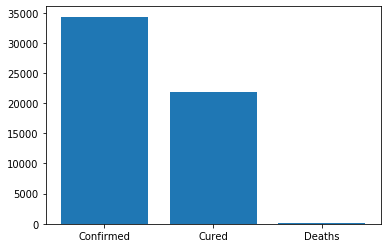

In [52]:
entry = input("Enter a state: ")
date = input("Enter a date: ")

ip = date_wise[date_wise['State/UnionTerritory']==entry][['Date','Confirmed','Cured','Deaths']]
a = ip[ip['Date']==date]

x = ['Confirmed','Cured','Deaths']
y = []
y.append(a['Confirmed'].values[0])
y.append(a['Cured'].values[0])
y.append(a['Deaths'].values[0])

print("The confirmed cases till %s are %d" %(date,y[0]))
print("The recovered cases till %s are %d" %(date,y[1]))
print("The deaths till %s are %d" %(date,y[2]))
plt.bar(x,y)
#y[0]
#date_wise.iloc[747]['Cured']

### Step 21: Getting count of Confirmed, Cured, Deaths for all states till date

In [53]:
date_wise.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [54]:
t = date_wise.groupby('State/UnionTerritory')[['Confirmed','Cured','Deaths']].sum()

In [55]:
t

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,1461311,1381883,18944
Andhra Pradesh,270440364,251842054,2117572
Arunachal Pradesh,4619157,4257945,14682
Assam,66322683,61027980,335961
Bihar,87441641,81029353,502330
Cases being reassigned to states,345565,0,0
Chandigarh,6910907,6232304,96118
Chhattisgarh,100013893,89090468,1202925
Dadra and Nagar Haveli,20722,20352,8


In [56]:
s = t[['Confirmed']].values
z = list(t.index)
s

array([[  1461311],
       [270440364],
       [  4619157],
       [ 66322683],
       [ 87441641],
       [   345565],
       [  6910907],
       [100013893],
       [    20722],
       [  1261966],
       [        2],
       [195424519],
       [ 17505108],
       [ 90718675],
       [ 85157065],
       [ 17238921],
       [ 37858229],
       [ 39978521],
       [306212399],
       [262232084],
       [  2769223],
       [   285861],
       [ 85830947],
       [735227925],
       [  7552666],
       [  3886016],
       [  1297273],
       [  3380334],
       [100831625],
       [ 12523469],
       [ 61834006],
       [101417133],
       [  1750240],
       [272629006],
       [ 20351336],
       [ 69990668],
       [  9569899],
       [      161],
       [203417849],
       [ 31358982],
       [166859631]], dtype=int64)

### Step 22: Taking input and getting the count and visualizing the Confirmed, Cured, Deaths for input state till date (Bar Graph)

Enter a state: Maharashtra
Confirmed Cases:  1461311
Cured Cases:  1381883
Deaths:  18944


<BarContainer object of 3 artists>

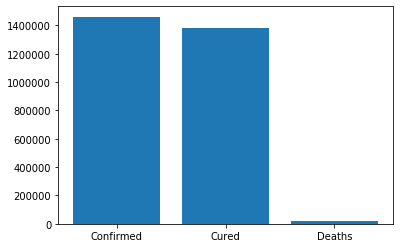

In [57]:
entry = input("Enter a state: ")

x = ['Confirmed','Cured','Deaths']
y = []
y.append(t['Confirmed'].values[0])
y.append(t['Cured'].values[0])
y.append(t['Deaths'].values[0])

cf = t['Confirmed'].values[0]
crd = t['Cured'].values[0]
dt = t['Deaths'].values[0]

print("Confirmed Cases: ",cf)
print("Cured Cases: ",crd)
print("Deaths: ",dt)

plt.bar(x,y)

### Step 23: Taking input and visualizing the Confirmed, Cured & Deaths for two  input states on a particular date (Bar Graph)

Enter a state: Bihar
Enter a state: Punjab
Enter a date: 2020-07-10


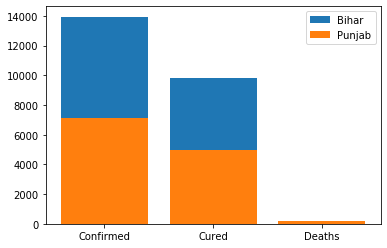

In [58]:
state1 = input("Enter a state: ")
state2 = input("Enter a state: ")
st_date = input("Enter a date: ")

ip1 = date_wise[date_wise['State/UnionTerritory']==state1][['Date','Confirmed','Cured','Deaths']]
ip2 = date_wise[date_wise['State/UnionTerritory']==state2][['Date','Confirmed','Cured','Deaths']]
st1 = ip1[ip1['Date']==st_date]
st2 = ip2[ip2['Date']==st_date]

x1 = ['Confirmed','Cured','Deaths']
y1 = []
y2 = []

y1.append(st1['Confirmed'].values[0])
y1.append(st1['Cured'].values[0])
y1.append(st1['Deaths'].values[0])

y2.append(st2['Confirmed'].values[0])
y2.append(st2['Cured'].values[0])
y2.append(st2['Deaths'].values[0])


plt.bar(x1,y1,label=state1)
plt.bar(x1,y2,label=state2)
plt.legend()

### Step 24: Taking input and visualizing the Confirmed, Cured & Deaths for two  input states on a particular date(Bar Graph)

Enter a state: Gujarat
Enter a state: Bihar
Enter a date: 2020-10-15


([<matplotlib.axis.XTick at 0x2258d763908>,
 <a list of 3 Text xticklabel objects>)

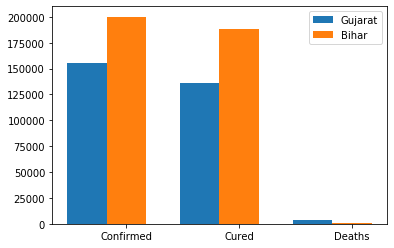

In [59]:
state1 = input("Enter a state: ")
state2 = input("Enter a state: ")
st_date = input("Enter a date: ")

ip1 = date_wise[date_wise['State/UnionTerritory']==state1][['Date','Confirmed','Cured','Deaths']]
ip2 = date_wise[date_wise['State/UnionTerritory']==state2][['Date','Confirmed','Cured','Deaths']]
st1 = ip1[ip1['Date']==st_date]
st2 = ip2[ip2['Date']==st_date]

barwidth = 0.35

x1 = ['Confirmed','Cured','Deaths']
x2 = ['Confirmed','Cured','Deaths']
y1 = []
y2 = []
y1.append(st1['Confirmed'].values[0])
y1.append(st1['Cured'].values[0])
y1.append(st1['Deaths'].values[0])

y2.append(st2['Confirmed'].values[0])
y2.append(st2['Cured'].values[0])
y2.append(st2['Deaths'].values[0])

br1 = np.arange(len(y1))
br2 = [x + barwidth for x in br1]

plt.bar(br1,y1,label=state1,width=barwidth)
plt.bar(br2,y2,label=state2,width=barwidth)
plt.legend()

plt.xticks([r + barwidth for r in range(len(y1))], ['Confirmed','Cured','Deaths'])

In [60]:
t = date_wise.groupby('State/UnionTerritory')[['Confirmed','Cured','Deaths']].sum()
t

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,1461311,1381883,18944
Andhra Pradesh,270440364,251842054,2117572
Arunachal Pradesh,4619157,4257945,14682
Assam,66322683,61027980,335961
Bihar,87441641,81029353,502330
Cases being reassigned to states,345565,0,0
Chandigarh,6910907,6232304,96118
Chhattisgarh,100013893,89090468,1202925
Dadra and Nagar Haveli,20722,20352,8


In [61]:
s = t[['Confirmed']].values
z = t.index
z

Index(['Andaman and Nicobar Islands', 'Andhra Pradesh', 'Arunachal Pradesh',
       'Assam', 'Bihar', 'Cases being reassigned to states', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram',
       'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Telengana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype='object', name='State/UnionTerritory')

### Step 25: Taking input and Visualizing the Confirmed / Cured / Death cases for all states (Using Horizontal Bar Graph)

Select a option
1. Confirmed
2. Cured
3. Deaths
2


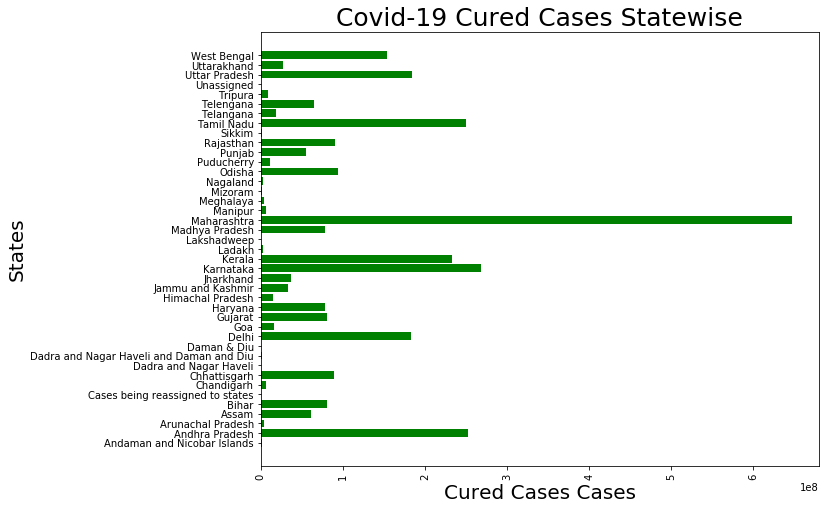

In [62]:
option = print("Select a option")
options1 = print("1. Confirmed")
options2 = print("2. Cured")
options3 = print("3. Deaths")
q = int(input())


if(q==1):
    fig = plt.subplots(figsize =(10, 8))
    plt.xticks(rotation=90)
    plt.xlabel("Confirmed Cases",fontsize=20)
    plt.ylabel("States",fontsize=20)
    plt.title("Covid-19 Confirmed Cases Statewise",fontsize=25)
    plt.barh(t.index,t['Confirmed'])

elif(q==2):
    fig = plt.subplots(figsize =(10, 8))
    plt.xticks(rotation=90)
    plt.xlabel("Cured Cases Cases",fontsize=20)
    plt.ylabel("States",fontsize=20)
    plt.title("Covid-19 Cured Cases Statewise",fontsize=25)
    plt.barh(t.index,t['Cured'],color='green')
    
elif(q==3):
    fig = plt.subplots(figsize =(10, 8))
    plt.xticks(rotation=90)
    plt.xlabel("Deaths",fontsize=20)
    plt.ylabel("States",fontsize=20)
    plt.title("Covid-19 Deaths Statewise",fontsize=25)
    plt.barh(t.index,t['Deaths'],color='red')

### Step 26: Visualizing the cases in States with least confirmed cases (Horizontal Bar Graph)

<BarContainer object of 10 artists>

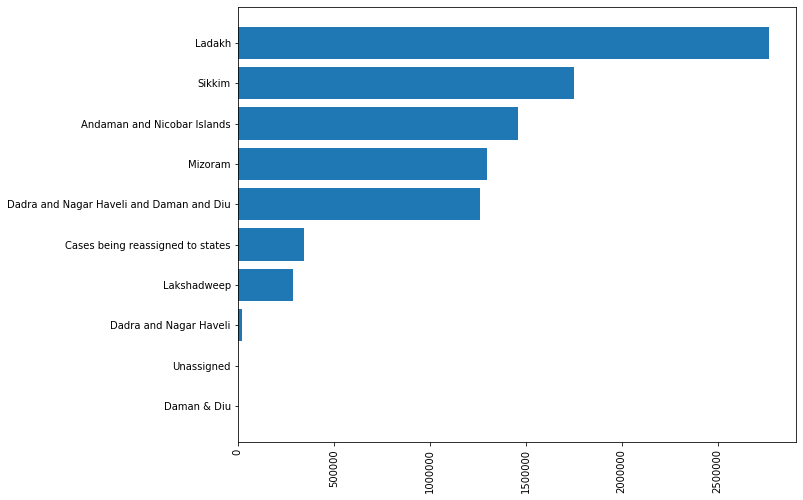

In [63]:
t = date_wise.groupby('State/UnionTerritory')[['Confirmed','Cured','Deaths']].sum()
r = t[['Confirmed']].sort_values('Confirmed')
least_10_confirmed_cases = r.iloc[:10]
#least_10_confirmed_cases
fig = plt.subplots(figsize=(10,8))
plt.xticks(rotation=90)
plt.barh(least_10_confirmed_cases.index,least_10_confirmed_cases['Confirmed'])

### Step 27: Taking input and Visualizing the cases in States with least Confirmed / Cured / Deaths (Horizontal Bar Graph)

Select a option
1. Top 10 states with least Confirmed cases
2. Top 10 states with least Cured cases
3. Top 10 states with least Deaths
1


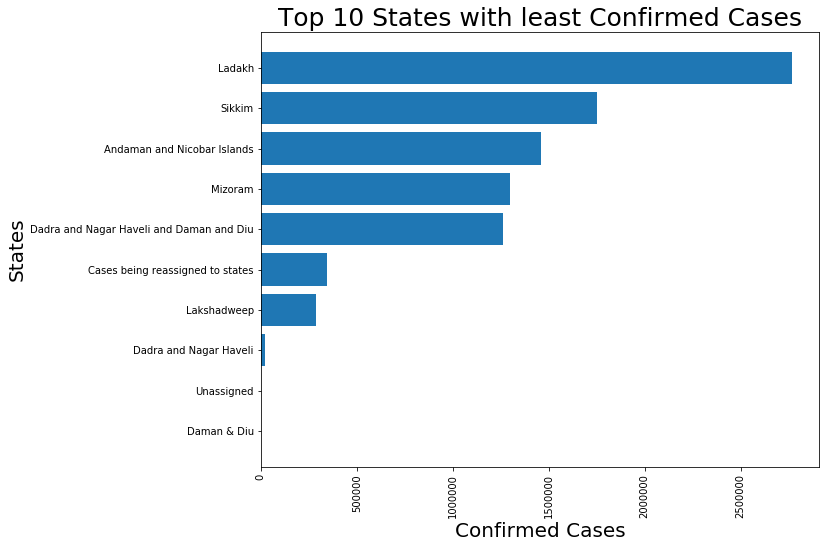

In [64]:
option = print("Select a option")
options1 = print("1. Top 10 states with least Confirmed cases")
options2 = print("2. Top 10 states with least Cured cases")
options3 = print("3. Top 10 states with least Deaths")
q = int(input())

if(q==1):
    r = t[['Confirmed']].sort_values('Confirmed')
    least_10_confirmed_cases = r.iloc[:10]
    #least_10_confirmed_cases
    fig = plt.subplots(figsize=(10,8))
    plt.xticks(rotation=90)
    plt.xlabel("Confirmed Cases",fontsize=20)
    plt.ylabel("States",fontsize=20)
    plt.title("Top 10 States with least Confirmed Cases",fontsize=25)
    plt.barh(least_10_confirmed_cases.index,least_10_confirmed_cases['Confirmed'])
    

elif(q==2):
    r = t[['Cured']].sort_values('Cured')
    least_10_cured_cases = r.iloc[:10]
    #least_10_cured_cases
    fig = plt.subplots(figsize=(10,8))
    plt.xticks(rotation=90)
    plt.xlabel("Cured Cases",fontsize=20)
    plt.ylabel("States",fontsize=20)
    plt.title("Top 10 States with least Cured Cases",fontsize=25)
    plt.barh(least_10_cured_cases.index,least_10_cured_cases['Cured'])
    
elif(q==3):
    r = t[['Deaths']].sort_values('Deaths')
    least_10_death_cases = r.iloc[:10]
    #print(least_10_death_cases)
    fig = plt.subplots(figsize=(10,8))
    plt.xticks(rotation=90)
    plt.xlabel("Deaths",fontsize=20)
    plt.ylabel("States",fontsize=20)
    plt.title("Top 10 States with least Deaths",fontsize=25)
    plt.barh(least_10_death_cases.index,least_10_death_cases['Deaths'])

In [65]:
t = date_wise.groupby('State/UnionTerritory')[['Confirmed','Cured','Deaths']].sum()
#t = t[['Deaths']].sort_values('Deaths')
#t = t[::-1]
#t[:10]
t[['Confirmed']].sum()

Confirmed    3483927982
dtype: int64

### Step 28: Taking input and Visualizing the cases in states with highest Confirmed / Cured / Deaths (Horizontal Bar Graph)

Select a option
1. Top 10 states with highest Confirmed cases
2. Top 10 states with highest Cured cases
3. Top 10 states with highest Deaths
1


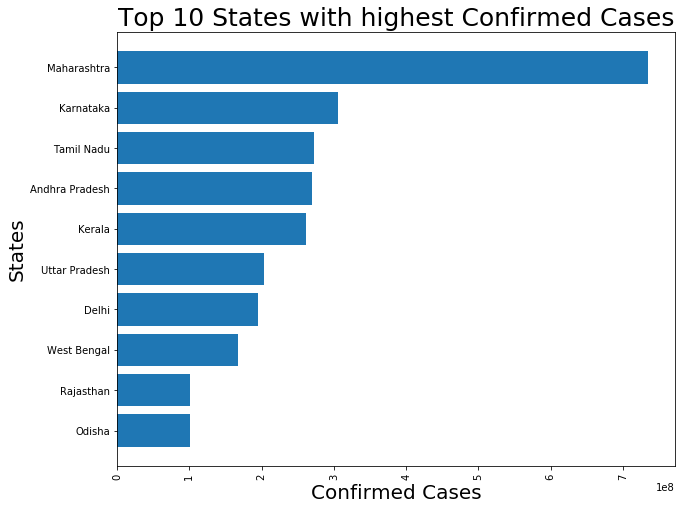

In [66]:
option = print("Select a option")
options1 = print("1. Top 10 states with highest Confirmed cases")
options2 = print("2. Top 10 states with highest Cured cases")
options3 = print("3. Top 10 states with highest Deaths")
q = int(input())

if(q==1):
    r = t[['Confirmed']].sort_values('Confirmed')
    r = r[::-1]
    z = r.iloc[:10]
    z = z[::-1]
    least_10_confirmed_cases = z
    #least_10_confirmed_cases
    fig = plt.subplots(figsize=(10,8))
    plt.xticks(rotation=90)
    plt.xlabel("Confirmed Cases",fontsize=20)
    plt.ylabel("States",fontsize=20)
    plt.title("Top 10 States with highest Confirmed Cases",fontsize=25)
    plt.barh(least_10_confirmed_cases.index,least_10_confirmed_cases['Confirmed'])
    

elif(q==2):
    r = t[['Cured']].sort_values('Cured')
    r = r[::-1]
    z = r.iloc[:10]
    z = z[::-1]
    least_10_cured_cases = z
    #least_10_cured_cases
    fig = plt.subplots(figsize=(10,8))
    plt.xticks(rotation=90)
    plt.xlabel("Cured Cases",fontsize=20)
    plt.ylabel("States",fontsize=20)
    plt.title("Top 10 States with highest Cured Cases",fontsize=25)
    plt.barh(least_10_cured_cases.index,least_10_cured_cases['Cured'])
    
elif(q==3):
    r = t[['Deaths']].sort_values('Deaths')
    r = r[::-1]
    z = r.iloc[:10]
    z = z[::-1]
    least_10_death_cases = z
    #print(least_10_death_cases)
    fig = plt.subplots(figsize=(10,8))
    plt.xticks(rotation=90)
    plt.xlabel("Deaths",fontsize=20)
    plt.ylabel("States",fontsize=20)
    plt.title("Top 10 States with highest Deaths",fontsize=25)
    plt.barh(least_10_death_cases.index,least_10_death_cases['Deaths'])

### End